In [7]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from scipy.ndimage.filters import gaussian_filter
import os

In [8]:
import skvideo
import skvideo.io

In [9]:
def load_video(fn):
    import skvideo
    import skvideo.io
    videodata = skvideo.io.vread(fn)
    return videodata

In [10]:
def save_video(videodata,ofn='outvideo.mp4'):
    import skvideo
    import skvideo.io
    #skvideo.io.vwrite(ofn, videodata.astype(np.uint8),outputdict={'-codec': 'h264', '-filter:v' : 'fps=29.97'})
    skvideo.io.vwrite(ofn, videodata.astype(np.uint8))

In [11]:
def safe_mkdir(fn):
    import os
    if not os.path.exists(fn):
        os.mkdir(fn)
        
def safe_mkdir_subdirs(fn):
    fn_split = fn.split('/')
    n = len(fn.split('/'))
    paths = ['/'.join(fn_split[0:i]) for i in range(0,n) if len('/'.join(fn_split[0:i]))>1]
    for path in paths:
        safe_mkdir(path)

In [12]:
indir = './Data/haa500_v1_1_resized/video'
folders = os.listdir(indir) ; folders.sort()

videos = []
for folder in folders:
    cont = [file for file in os.listdir(os.path.join(indir,folder)) if file.endswith('.mp4')]
    videos.append(cont)
    
print(len(folders))
print(np.array([len(folder) for folder in videos]))

500
[20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 2

In [15]:
from datetime import datetime
now = datetime.now

In [16]:
f = 0

In [17]:
for v in range(20):
    fn = os.path.join(indir,folders[f],videos[f][v])
    print(fn)
    filename = fn.split('/')[-1]
    frames_dir = fn.replace('haa500_v1_1_resized','haa500_v1_1_frames').replace('.mp4','/')
    safe_mkdir_subdirs(fn.replace('haa500_v1_1_resized','haa500_v1_1_frames'))
    safe_mkdir_subdirs(frames_dir)
    if not os.path.exists(os.path.join(frames_dir,filename)):
        print(f'folder {f:03d}/500 | video {v:02d}/20 | {now()}')
        video_data = load_video(fn)
        n = video_data.shape[0]
        save_video(video_data,os.path.join(frames_dir,filename))
        print(os.path.join(frames_dir,filename))
        [plt.imsave(fname=os.path.join(frames_dir,filename.replace('.mp4',f'_{i:03d}.png')), arr=video_data[i,:,:,:]) for i in range(n)];

./Data/haa500_v1_1_resized/video/ALS_IceBucket_Challenge/ALS_IceBucket_Challenge_014.mp4
folder 000/500 | video 00/20 | 2023-03-17 08:24:10.447276
./Data/haa500_v1_1_frames/video/ALS_IceBucket_Challenge/ALS_IceBucket_Challenge_014/ALS_IceBucket_Challenge_014.mp4
./Data/haa500_v1_1_resized/video/ALS_IceBucket_Challenge/ALS_IceBucket_Challenge_004.mp4
folder 000/500 | video 01/20 | 2023-03-17 08:24:13.420872
./Data/haa500_v1_1_frames/video/ALS_IceBucket_Challenge/ALS_IceBucket_Challenge_004/ALS_IceBucket_Challenge_004.mp4
./Data/haa500_v1_1_resized/video/ALS_IceBucket_Challenge/ALS_IceBucket_Challenge_005.mp4
folder 000/500 | video 02/20 | 2023-03-17 08:24:16.140732
./Data/haa500_v1_1_frames/video/ALS_IceBucket_Challenge/ALS_IceBucket_Challenge_005/ALS_IceBucket_Challenge_005.mp4
./Data/haa500_v1_1_resized/video/ALS_IceBucket_Challenge/ALS_IceBucket_Challenge_008.mp4
folder 000/500 | video 03/20 | 2023-03-17 08:24:18.907938
./Data/haa500_v1_1_frames/video/ALS_IceBucket_Challenge/ALS_IceB

100%|█████████████████████████████████████████████████████████████████████████████████| 500/500 [05:13<00:00,  1.59it/s]

[]


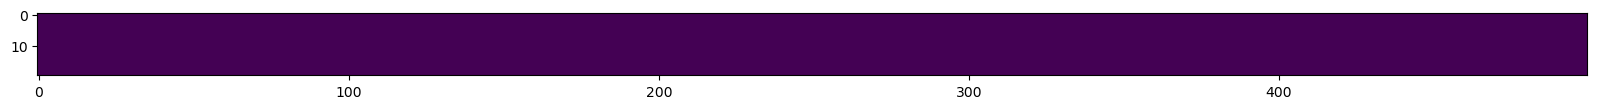

In [69]:
QA_done = False
if QA_done:
    arr_nframes = np.zeros((20,500))
    arr_nimg = np.zeros((20,500))
    for f in tqdm(range(500)):
        for v in range(20):        
            video_fn = os.path.join(indir,folders[f],videos[f][v])
            nframes  = int(skvideo.io.ffprobe(video_fn)['video']['@nb_frames'])
            arr_nframes[v,f] = nframes


            frames_fn = video_fn.replace('haa500_v1_1_resized','haa500_v1_1_frames').replace('.mp4','/')
            if os.path.exists(frames_fn):
                nimg = len([i for i in os.listdir(frames_fn) if i.endswith('.png')])
            else:
                nimg = 0
            arr_nimg[v,f] = nimg        
            
    arr_isdone = arr_nframes==arr_nimg
    print(arr_isdone.mean())
    print(np.nonzero(arr_isdone.sum(axis=0)<20)[0])
    plt.figure(figsize=(20,5));
    plt.imshow(arr_isdone,vmin=0,vmax=1);